# Capstone Project - The Battle of Neighborhoods

# Table of contents
### -Introduction
### -Data
### -Methodology
### -Analysis
### -Results and Discussion
### -Conclusion

## 1. Introduction 

Essen is a city in western Germany. Its population of about 600,000 makes it the ninth largest city of Germany, as well as the fourth largest city of the federal state of North Rhine-Westphalia. On the Ruhr and Emscher rivers, Essen geographically is part of the Rhineland and the larger Rhine-Ruhr Metropolitan Region.

It has a variety of restaurants for every taste therefore to start a restaurant business in this area is not an easy task.

Our stakeholder is willing to open the beer restaurant with middle-high level in Essen .Of course, choosing a location for business is one of the stressful and controversial tasks, since there are a lot of criteria that have to be satisfied in order to achieve the highest revenue. Here are some of them:

the density of other restaurants
the density of specifically beer restaurants
population density around the location
solvency of the population around the location
...

In this project, we will implement the basic analysis and try to find the most optimal Borough to open the beer restaurant according to those criteria. It's obvious, that there are many additional factors, such as distance from parking places or distance from the main streets, but this analysis can be done after choosing the Borough, and thus will not be done within the scope of this project.

# 2. Data

## 2.1 Data Description

Based on criteria listed above the following data will be utilized in our analysis:

***the number of restaurants within the certain radius of each borough (Foresquare API)

***the net income per person in each borough. Since the restaurant will have middle-high prices, it is important to consider the solvency of population.

***the population and the population density of the borough.Source : https://www.citypopulation.de/en/germany/essen/admin/

***the population above 18 years age. It is obvious, that potential visitors of our beer restaurant are men and women of full age.

## 2.2 Data Preparation

## First, let's import all the libraries that we will need

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be UPDATED:

  openssl               anaconda::openssl-1.1.1g-h7b6447c_0 --> conda-forge::openssl-1.1.1g-h516909a_1

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates     anaconda::ca-certificates-2020.7.22-0 --> conda-forge::ca-certificates-2020.6.20-hecda079_0
  certifi                anaconda::certifi-2020.6.20-py36_0 --> conda-forge::certifi-2020.6.20-py36h9f0ad1d_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update con

In [2]:
import requests # library to handle requests

In [3]:
!conda install -c conda-forge BeautifulSoup4 --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [4]:
from bs4 import BeautifulSoup

# Load the population and population density of each borough into a new dataframe.

In [5]:
url="https://www.citypopulation.de/en/germany/essen/admin/"
source = requests.get(url).text
soup = BeautifulSoup(source, 'html')

# get the table from the webpage
table = soup.find('table',{'class':"data"})
#soup.select('div > p')[1].get_text(strip=True)
table_rows = table.find_all('tr')

#table_rows
data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])
df = pd.DataFrame(data)
df.columns = ['Name', 'Status', 'b', 'c', 'd', 'Population', 'e']
#The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
df.drop(columns=['b','c','d','e'],inplace=True)

df.drop([0],inplace = True)
Borough_df = df[df['Status'].str.contains('Borough')] 
Borough_df = Borough_df.reset_index(drop=True)

Borough_df['Population'] = Borough_df['Population'].astype('str')
Borough_df['Population'] = Borough_df['Population'].str.replace(',', '')
Borough_df['Population'] = pd.to_numeric(Borough_df['Population'], errors='coerce')

print(Borough_df)

               Name   Status  Population
0     Stadtbezirk I  Borough       68336
1    Stadtbezirk II  Borough       54226
2   Stadtbezirk III  Borough       99230
3    Stadtbezirk IV  Borough       83653
4     Stadtbezirk V  Borough       58209
5    Stadtbezirk VI  Borough       52229
6   Stadtbezirk VII  Borough       71543
7  Stadtbezirk VIII  Borough       51868
8    Stadtbezirk IX  Borough       51724


In [6]:
Borough_df.dtypes

Name          object
Status        object
Population     int64
dtype: object

In [7]:
url="https://de.wikipedia.org/wiki/Benutzer_Diskussion:Hassan_Yousef_1985"
source = requests.get(url).text
soup = BeautifulSoup(source, 'html')

# get the table from the webpage
table = soup.find('table',{'class':'wikitable'})
table_rows = table.find_all('tr')

#table_rows
data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

#The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
df_km = pd.DataFrame(data, columns=['Borough', 'Area in km²', 'Population','Population Density'])
df_km.drop([0],inplace = True)
df_km = df_km.reset_index(drop=True) # to start index with 0
print(df_km)

            Borough Area in km² Population Population Density
0     Stadtbezirk I       15,59      68263               4378
1    Stadtbezirk II       13,41      54329               4051
2   Stadtbezirk III       16,41      99253               6048
3    Stadtbezirk IV       24,68      83665               3389
4     Stadtbezirk V       18,33      58262               3178
5    Stadtbezirk VI       13,01      52349               4023
6   Stadtbezirk VII       20,80      71304               3428
7  Stadtbezirk VIII       33,36      51929               1556
8    Stadtbezirk IX       54,91      51788                925


In [8]:
df_km.dtypes

Borough               object
Area in km²           object
Population            object
Population Density    object
dtype: object

### Convert the column "Area in km²" from type "object" to type "float64"

In [9]:
df_km['Area in km²'] = df_km['Area in km²'].astype('str')
df_km['Area in km²'] = df_km['Area in km²'].str.replace(',', '.')
df_km['Area in km²'] = pd.to_numeric(df_km['Area in km²'], errors='coerce')

In [10]:
print(df_km)

            Borough  Area in km² Population Population Density
0     Stadtbezirk I        15.59      68263               4378
1    Stadtbezirk II        13.41      54329               4051
2   Stadtbezirk III        16.41      99253               6048
3    Stadtbezirk IV        24.68      83665               3389
4     Stadtbezirk V        18.33      58262               3178
5    Stadtbezirk VI        13.01      52349               4023
6   Stadtbezirk VII        20.80      71304               3428
7  Stadtbezirk VIII        33.36      51929               1556
8    Stadtbezirk IX        54.91      51788                925


In [11]:
df_km.dtypes

Borough                object
Area in km²           float64
Population             object
Population Density     object
dtype: object

In [12]:
url="https://en.wikipedia.org/wiki/User:Hassan_Yousef_1985/sandbox"
source = requests.get(url).text
soup = BeautifulSoup(source, 'html')

# get the table from the webpage
table = soup.find('table',{'class':'wikitable'})
table_rows = table.find_all('tr')

#table_rows
data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

#The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
df = pd.DataFrame(data, columns=['Borough','Under 18'])
df.drop([0],inplace = True)
df = df.reset_index(drop=True) # to start index with 0
print(df)

                                             Borough Under 18
0       Stadtbezirk I Stadtmitte/Frillendorf/Huttrop    10917
1  Stadtbezirk II Rüttenscheid/Bergerhausen/Relli...     6941
2                         Stadtbezirk III Essen-West    15461
3                             Stadtbezirk IV Borbeck    13124
4          Stadtbezirk V Altenessen/Karnap/Vogelheim    11286
5               Stadtbezirk VIII Essen-Ruhrhalbinsel    10256
6  Stadtbezirk VI Katernberg/Schonnebeck/Stoppenberg    12624
7                        Stadtbezirk VII Steele/Kray     7756
8             Stadtbezirk IX Werden/Kettwig/Bredeney     7581


## Load the coordinates of the boroughs into a dataframe.

In [13]:
from pandas import read_excel
my_sheet = 'Sheet1' # change it to the sheet name
file_name = 'Lon-Lat.xlsx' # change it to the name of your excel file
df_lon_lat = read_excel(file_name, sheet_name = my_sheet)
print(df_lon_lat) # shows headers with top 5 rows

            Borough   Latitude  Longitude
0     Stadtbezirk I  51.466564   7.001986
1    Stadtbezirk II  51.425251   7.032930
2   Stadtbezirk III  51.439594   6.969586
3    Stadtbezirk IV  51.454747   6.936567
4     Stadtbezirk V  51.306007   6.761242
5    Stadtbezirk VI  51.482828   7.040808
6   Stadtbezirk VII  51.239720   6.860883
7  Stadtbezirk VIII  51.401287   7.080432
8    Stadtbezirk IX  51.451628   7.012125


## Load the population and population density of each borough into a new dataframe.

In [14]:
url="https://de.wikipedia.org/wiki/Benutzer_Diskussion:Hassan_Yousef_1985"
source = requests.get(url).text
soup = BeautifulSoup(source, 'html')

# get the table from the webpage
table = soup.find('table',{'class':'wikitable'})
table_rows = table.find_all('tr')

#table_rows
data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

#The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
df_population = pd.DataFrame(data, columns=['Borough', 'Area in km²', 'Population','Population Density'])
df_population.drop([0],inplace = True)
df_population.drop(df_population.columns[1],axis=1, inplace = True)
df_population = df_population.reset_index(drop=True) # to start index with 0
print(df_population)

            Borough Population Population Density
0     Stadtbezirk I      68263               4378
1    Stadtbezirk II      54329               4051
2   Stadtbezirk III      99253               6048
3    Stadtbezirk IV      83665               3389
4     Stadtbezirk V      58262               3178
5    Stadtbezirk VI      52349               4023
6   Stadtbezirk VII      71304               3428
7  Stadtbezirk VIII      51929               1556
8    Stadtbezirk IX      51788                925


## Load the the percentage of underages in each borough into a new dataframe.

In [15]:
my_sheet = 'Sheet1' # change it to the sheet name
file_name = 'under18.xlsx' # change it to the name of your excel file
df_18 = read_excel(file_name, sheet_name = my_sheet)
df_18 = df_18.rename(columns={'under 18':'under_18'})
df_18['Percentage under 19 years old'] = (df_18['under_18'] * 100)/ df_18['under_18'].sum()
print(df_18) # shows headers with top 5 rows

            Borough  total  under_18  Percentage under 19 years old
0    Stadtbezirk I   68236     10917                      11.378275
1    Stadtbezirk II  54129      6941                       7.234278
2  Stadtbezirk III   99253     15461                      16.114273
3    Stadtbezirk IV  83665     13124                      13.678528
4     Stadtbezirk V  58262     11286                      11.762867
5    Stadtbezirk VI  52349     10256                      10.689346
6   Stadtbezirk VII  71304     12624                      13.157401
7  Stadtbezirk VIII  51973      7756                       8.083714
8    Stadtbezirk IX  51788      7581                       7.901319


## Let's now apply some math into a dataframes df_population and df_18 to obtain the population of full age and create a new dataframe df_population

In [16]:
df_population['Population'] = df_18["total"].subtract(df_18["under_18"])
df_population['Population Density'] =  round(df_population['Population'].div(df_km['Area in km²']))
df_population[['Population Density','Population']] = df_population[['Population Density','Population']].astype('int64')
print(df_population)

            Borough  Population  Population Density
0     Stadtbezirk I       57319                3677
1    Stadtbezirk II       47188                3519
2   Stadtbezirk III       83792                5106
3    Stadtbezirk IV       70541                2858
4     Stadtbezirk V       46976                2563
5    Stadtbezirk VI       42093                3235
6   Stadtbezirk VII       58680                2821
7  Stadtbezirk VIII       44217                1325
8    Stadtbezirk IX       44207                 805


## Load the the data of Net income per person in each borough into a new dataframe.

In [17]:
my_sheet = 'Sheet1' # change it to the sheet name
file_name = 'Net_income.xlsx' # change it to the name of your excel file
df_income = read_excel(file_name, sheet_name = my_sheet)
df_income = df_income.rename(columns={'Net income':'Net_income'})
print(df_income) # shows headers with top 5 rows

            Borough  Net_income
0     Stadtbezirk I       90.40
1    Stadtbezirk II      110.60
2   Stadtbezirk III      120.60
3    Stadtbezirk IV       98.20
4     Stadtbezirk V      111.11
5    Stadtbezirk VI      101.90
6   Stadtbezirk VII       99.50
7  Stadtbezirk VIII       89.30
8    Stadtbezirk IX      104.50


## Let us merege two dataframes

In [18]:
df1 = df_lon_lat.join(df_population.set_index('Borough'), on='Borough')
df2 = df1.join(df_income.set_index('Borough'), on='Borough')
print(df2)

            Borough   Latitude  Longitude  Population  Population Density  \
0     Stadtbezirk I  51.466564   7.001986       57319                3677   
1    Stadtbezirk II  51.425251   7.032930       47188                3519   
2   Stadtbezirk III  51.439594   6.969586       83792                5106   
3    Stadtbezirk IV  51.454747   6.936567       70541                2858   
4     Stadtbezirk V  51.306007   6.761242       46976                2563   
5    Stadtbezirk VI  51.482828   7.040808       42093                3235   
6   Stadtbezirk VII  51.239720   6.860883       58680                2821   
7  Stadtbezirk VIII  51.401287   7.080432       44217                1325   
8    Stadtbezirk IX  51.451628   7.012125       44207                 805   

   Net_income  
0       90.40  
1      110.60  
2      120.60  
3       98.20  
4      111.11  
5      101.90  
6       99.50  
7       89.30  
8      104.50  


## Use geopy library to get the latitude and longitude values of Essen City.

In [19]:
address = 'Essen'
geolocator = Nominatim(user_agent="hy_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Essen are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Essen are 51.4582235, 7.0158171.


## Define Foursquare Credentials and Version.

In [20]:
CLIENT_ID = 'CZY0LLMAXSKEO2SSHA2143QJTLT31ECR11LHEUNKQSKRKOSP' #  Foursquare ID
CLIENT_SECRET = 'SCCUW1BWQHHQ5ZNAGC3AU4XER4OME5IBEE5FDYBG4ZC4TWDD' #  Foursquare Secret
VERSION = '20200804' # Foursquare API version

print('The credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

The credentails:
CLIENT_ID: CZY0LLMAXSKEO2SSHA2143QJTLT31ECR11LHEUNKQSKRKOSP
CLIENT_SECRET:SCCUW1BWQHHQ5ZNAGC3AU4XER4OME5IBEE5FDYBG4ZC4TWDD


## Create a function to repeat the process of exploring the venues for all the neighborhoods in Essen

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Create a new dataframe called Essen_venues

In [22]:
LIMIT = 100
radius = 1000
Essen_venues = getNearbyVenues(names=df2['Borough'],
                                   latitudes=df2['Latitude'],
                                   longitudes=df2['Longitude'],
                                   radius = radius
                                  )

Stadtbezirk I
Stadtbezirk II
Stadtbezirk III
Stadtbezirk IV
Stadtbezirk V
Stadtbezirk VI
Stadtbezirk VII
Stadtbezirk VIII
Stadtbezirk IX


In [23]:
print(Essen_venues.shape)
print(Essen_venues)

(263, 7)
              Borough  Borough Latitude  Borough Longitude  \
0       Stadtbezirk I         51.466564           7.001986   
1       Stadtbezirk I         51.466564           7.001986   
2       Stadtbezirk I         51.466564           7.001986   
3       Stadtbezirk I         51.466564           7.001986   
4       Stadtbezirk I         51.466564           7.001986   
5       Stadtbezirk I         51.466564           7.001986   
6       Stadtbezirk I         51.466564           7.001986   
7       Stadtbezirk I         51.466564           7.001986   
8       Stadtbezirk I         51.466564           7.001986   
9       Stadtbezirk I         51.466564           7.001986   
10      Stadtbezirk I         51.466564           7.001986   
11      Stadtbezirk I         51.466564           7.001986   
12      Stadtbezirk I         51.466564           7.001986   
13      Stadtbezirk I         51.466564           7.001986   
14      Stadtbezirk I         51.466564           7.001986   

## Let's check how many venues were returned for each neighborhood

In [24]:
print(Essen_venues.groupby('Borough').count())

                  Borough Latitude  Borough Longitude  Venue  Venue Latitude  \
Borough                                                                        
Stadtbezirk I                   55                 55     55              55   
Stadtbezirk II                  18                 18     18              18   
Stadtbezirk III                 24                 24     24              24   
Stadtbezirk IV                   9                  9      9               9   
Stadtbezirk IX                 100                100    100             100   
Stadtbezirk V                    6                  6      6               6   
Stadtbezirk VI                  19                 19     19              19   
Stadtbezirk VII                 19                 19     19              19   
Stadtbezirk VIII                13                 13     13              13   

                  Venue Longitude  Venue Category  
Borough                                            
Stadtbezirk I  

## Let's check how many venues were returned for each neighborhood in special cases

In [25]:
Essen_venues[(Essen_venues['Venue Category'].str.contains('Beer', regex=False)) |
             (Essen_venues['Venue Category'].str.contains('Beer Garden', regex=False)) |
             (Essen_venues['Venue Category'].str.contains('Restaurant', regex=False)) |
             (Essen_venues['Venue Category'].str.contains('Bar', regex=False)) |
             (Essen_venues['Venue Category'].str.contains('Taverna', regex=False))].count()

Borough              58
Borough Latitude     58
Borough Longitude    58
Venue                58
Venue Latitude       58
Venue Longitude      58
Venue Category       58
dtype: int64

In [26]:
Essen_venues[(Essen_venues['Venue Category'].str.contains('Beer', regex=False)) |
             (Essen_venues['Venue Category'].str.contains('Beer Garden', regex=False)) |
             (Essen_venues['Venue Category'].str.contains('German Restaurant', regex=False)) |
             (Essen_venues['Venue Category'].str.contains('Bar', regex=False)) |
             (Essen_venues['Venue Category'].str.contains('Taverna', regex=False))].count()

Borough              12
Borough Latitude     12
Borough Longitude    12
Venue                12
Venue Latitude       12
Venue Longitude      12
Venue Category       12
dtype: int64

## Let's check how many Restaurants were returned for each neighborhood

In [27]:
Essen_restaurant = Essen_venues[(Essen_venues['Venue Category'].str.contains('Beer', regex=False)) |
                 (Essen_venues['Venue Category'].str.contains('Beer Garden', regex=False)) |
                 (Essen_venues['Venue Category'].str.contains('Restaurant', regex=False)) |
                 (Essen_venues['Venue Category'].str.contains('Bar', regex=False)) |
                 (Essen_venues['Venue Category'].str.contains('Taverna', regex=False))].groupby(['Borough']).count()
Essen_restaurant.drop(['Borough Latitude', 'Borough Longitude', 'Venue Longitude', 'Venue', 'Venue Latitude'], axis = 1, inplace = True)
Essen_restaurant.rename(columns = {'Venue Category':'Number of restaurants'}, inplace=True)
print(Essen_restaurant)

                  Number of restaurants
Borough                                
Stadtbezirk I                        11
Stadtbezirk II                        1
Stadtbezirk III                       4
Stadtbezirk IV                        2
Stadtbezirk IX                       28
Stadtbezirk V                         1
Stadtbezirk VI                        3
Stadtbezirk VII                       4
Stadtbezirk VIII                      4


## Let's check how many Beer Restaurants were returned for each neighborhood

In [28]:
Essen_beer = Essen_venues[(Essen_venues['Venue Category'].str.contains('Beer', regex=False)) |
                 (Essen_venues['Venue Category'].str.contains('Beer Garden', regex=False)) |
                 (Essen_venues['Venue Category'].str.contains('German Restaurant', regex=False)) |
                 (Essen_venues['Venue Category'].str.contains('Bar', regex=False)) |
                 (Essen_venues['Venue Category'].str.contains('Taverna', regex=False))].groupby(['Borough']).count()
Essen_beer.drop(['Borough Latitude', 'Borough Longitude', 'Venue Longitude', 'Venue', 'Venue Latitude'], axis = 1, inplace = True)
Essen_beer.rename(columns = {'Venue Category':'Number of beer restaurants'}, inplace=True)
print(Essen_beer)

                  Number of beer restaurants
Borough                                     
Stadtbezirk I                              3
Stadtbezirk III                            2
Stadtbezirk IX                             4
Stadtbezirk V                              1
Stadtbezirk VII                            1
Stadtbezirk VIII                           1


## join above dataframe to the main df_lon_lat

## Number of the restaurants with the main dataframe

In [29]:
df_res = df2.join(Essen_restaurant, on='Borough')
print(df_res)

            Borough   Latitude  Longitude  Population  Population Density  \
0     Stadtbezirk I  51.466564   7.001986       57319                3677   
1    Stadtbezirk II  51.425251   7.032930       47188                3519   
2   Stadtbezirk III  51.439594   6.969586       83792                5106   
3    Stadtbezirk IV  51.454747   6.936567       70541                2858   
4     Stadtbezirk V  51.306007   6.761242       46976                2563   
5    Stadtbezirk VI  51.482828   7.040808       42093                3235   
6   Stadtbezirk VII  51.239720   6.860883       58680                2821   
7  Stadtbezirk VIII  51.401287   7.080432       44217                1325   
8    Stadtbezirk IX  51.451628   7.012125       44207                 805   

   Net_income  Number of restaurants  
0       90.40                     11  
1      110.60                      1  
2      120.60                      4  
3       98.20                      2  
4      111.11                     

## Number of the beer restaurants with the main dataframe

In [30]:
df_res_beer = df_res.join(Essen_beer, on='Borough')
print(df_res_beer)

            Borough   Latitude  Longitude  Population  Population Density  \
0     Stadtbezirk I  51.466564   7.001986       57319                3677   
1    Stadtbezirk II  51.425251   7.032930       47188                3519   
2   Stadtbezirk III  51.439594   6.969586       83792                5106   
3    Stadtbezirk IV  51.454747   6.936567       70541                2858   
4     Stadtbezirk V  51.306007   6.761242       46976                2563   
5    Stadtbezirk VI  51.482828   7.040808       42093                3235   
6   Stadtbezirk VII  51.239720   6.860883       58680                2821   
7  Stadtbezirk VIII  51.401287   7.080432       44217                1325   
8    Stadtbezirk IX  51.451628   7.012125       44207                 805   

   Net_income  Number of restaurants  Number of beer restaurants  
0       90.40                     11                         3.0  
1      110.60                      1                         NaN  
2      120.60               

In [31]:
df_res_beer['Number of beer restaurants']

0    3.0
1    NaN
2    2.0
3    NaN
4    1.0
5    NaN
6    1.0
7    1.0
8    4.0
Name: Number of beer restaurants, dtype: float64

# 3. Methodology and Analysis

After cleaning and preparing the data, let us identify the steps, that have to be performed in order to find the most optimal boroughs. Firstly, we will apply some basic exploratory analysis to our data. For that let's find the location of each borough on the map. Then we can visually inspect some values in our data with the help of bar charts. Secondly, we have the possibility to reduce the number features in data frame by replacing them with more reasonable data. Finally, we will perform cluster analysis to find the best cluster of boroughs with meaningful features.

## 3.1 Exploratory Data Analysis

## Let's first derive some basic statistical values of our data.

In [32]:
print(df_res_beer.describe())

        Latitude  Longitude    Population  Population Density  Net_income  \
count   9.000000   9.000000      9.000000            9.000000    9.000000   
mean   51.407514   6.966284  55001.444444         2878.777778  102.901111   
std     0.081530   0.100279  14204.693741         1272.434751   10.114372   
min    51.239720   6.761242  42093.000000          805.000000   89.300000   
25%    51.401287   6.936567  44217.000000         2563.000000   98.200000   
50%    51.439594   7.001986  47188.000000         2858.000000  101.900000   
75%    51.454747   7.032930  58680.000000         3519.000000  110.600000   
max    51.482828   7.080432  83792.000000         5106.000000  120.600000   

       Number of restaurants  Number of beer restaurants  
count               9.000000                    6.000000  
mean                6.444444                    2.000000  
std                 8.618456                    1.264911  
min                 1.000000                    1.000000  
25%        

## It's also would be quite useful to visualize the center locations of each borough. For that, we need to create a map of Essen with boroughs superimposed on top.

In [33]:
# create map of Essen  using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_res_beer['Latitude'], df_res_beer['Longitude'], df_res_beer['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

## Visualization. In our case barcharts will be utilized.

In [34]:
conda install -c anaconda pandas-profiling

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - pandas-profiling


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2020.6.2~ --> anaconda::ca-certificates-2020.7.22-0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2020.6.20-py36h9~ --> anaconda::certifi-2020.6.20-py36_0
  openssl            conda-forge::openssl-1.1.1g-h516909a_1 --> anaconda::openssl-1.1.1g-h7b6447c_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [35]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

In [36]:
df_res_beer['Population'] = df_res_beer['Population'].astype('str')
df_res_beer['Population'] = df_res_beer['Population'].str.replace(',', '')
df_res_beer['Population'] = pd.to_numeric(df_res_beer['Population'], errors='coerce')

df_res_beer['Population Density'] = df_res_beer['Population Density'].astype('str')
df_res_beer['Population Density'] = df_res_beer['Population Density'].str.replace(',', '')
df_res_beer['Population Density'] = pd.to_numeric(df_res_beer['Population Density'], errors='coerce')
df_res_beer[['Borough','Population' ,'Population Density']].dtypes

Borough               object
Population             int64
Population Density     int64
dtype: object

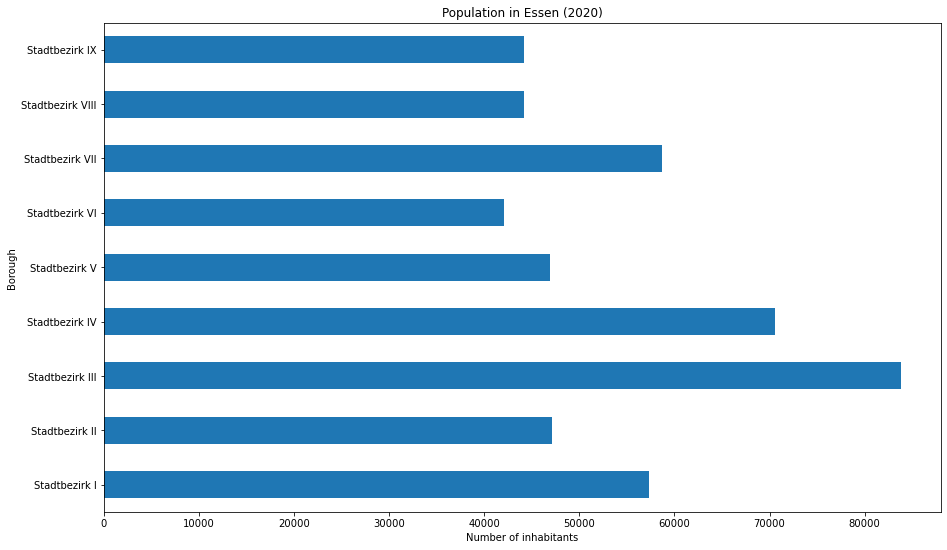

In [37]:
# step 2: plot data
df_res_beer[['Borough', 'Population']].plot(kind='barh', figsize=(15, 9), legend = None)

plt.xlabel('Number of inhabitants') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('Population in Essen (2020)') # add title to the plot
plt.yticks (np.arange(9), df_res_beer['Borough'])
plt.show()

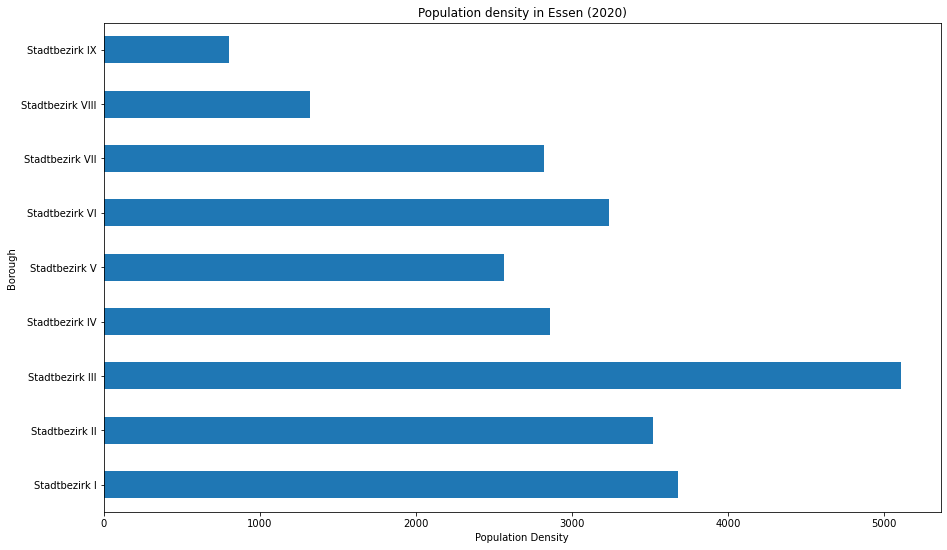

In [38]:
# step 2: plot data
df_res_beer[['Borough', 'Population Density']].plot(kind='barh', figsize=(15, 9), legend = None)

plt.xlabel('Population Density') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('Population density in Essen (2020)') # add title to the plot
plt.yticks (np.arange(9), df_res_beer['Borough'])
plt.show()

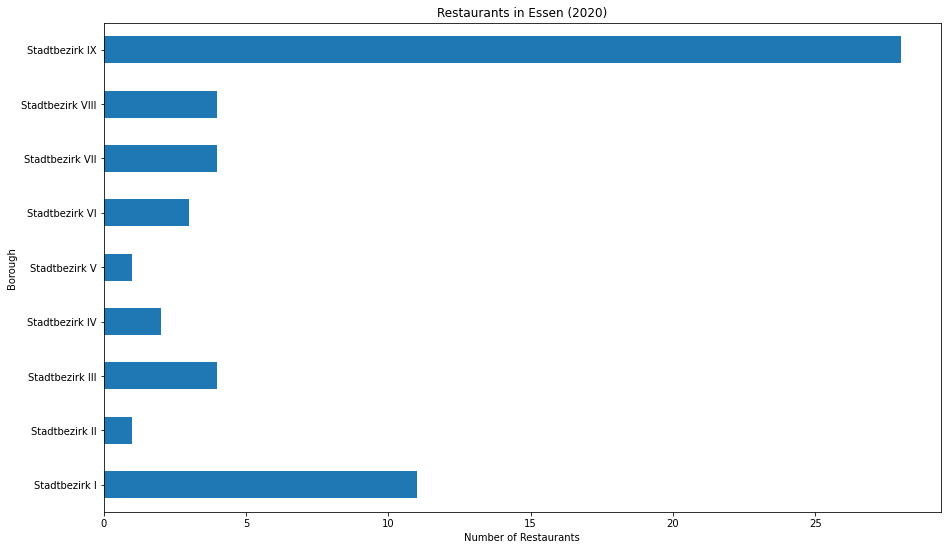

In [39]:
# step 2: plot data
df_res_beer[['Borough','Number of restaurants']].plot(kind='barh', figsize=(15, 9), legend = None)
#df[['Borough', 'Population']].plot(kind='barh', figsize=(15, 9), legend = None)
plt.xlabel('Number of Restaurants') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('Restaurants in Essen (2020)') # add title to the plot
plt.yticks (np.arange(9), df_res_beer['Borough'])
plt.show()

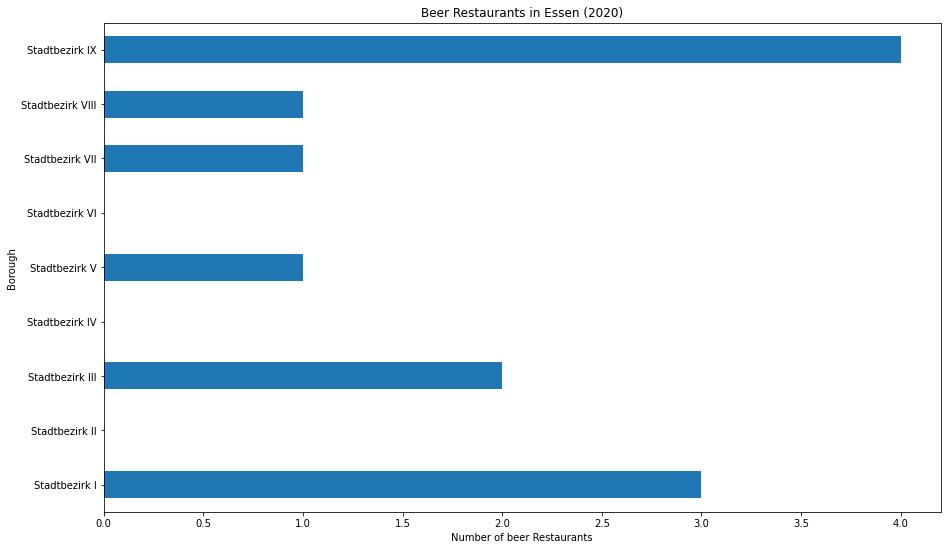

In [40]:
# step 2: plot data
df_res_beer[['Borough','Number of beer restaurants']].plot(kind='barh', figsize=(15, 9), legend = None)
#df[['Borough', 'Population']].plot(kind='barh', figsize=(15, 9), legend = None)
plt.xlabel('Number of beer Restaurants') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('Beer Restaurants in Essen (2020)') # add title to the plot
plt.yticks (np.arange(9), df_res_beer['Borough'])
plt.show()

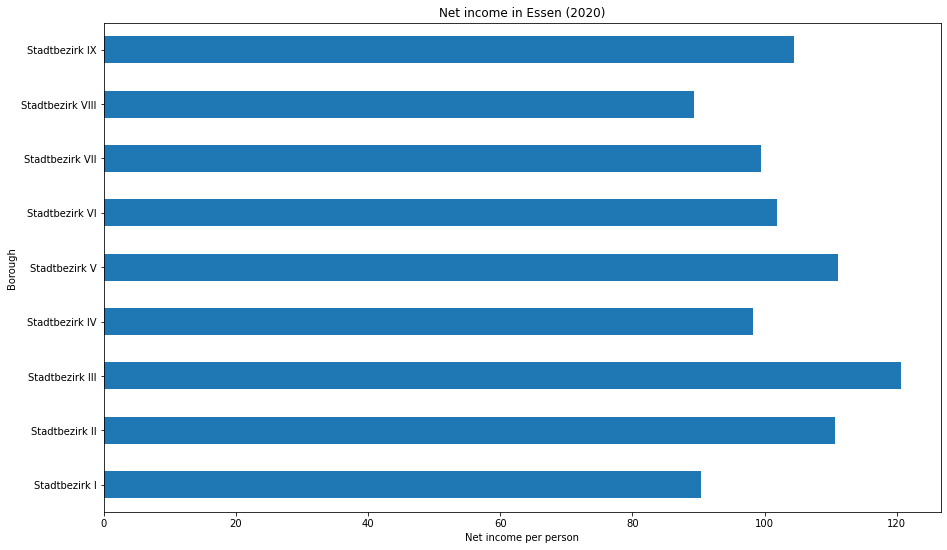

In [41]:
# step 2: plot data
df_res_beer[['Borough','Net_income']].plot(kind='barh', figsize=(15, 9), legend = None)
#df[['Borough', 'Population']].plot(kind='barh', figsize=(15, 9), legend = None)
plt.xlabel('Net income per person') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('Net income in Essen (2020)') # add title to the plot
plt.yticks (np.arange(9), df_res_beer['Borough'])
plt.show()

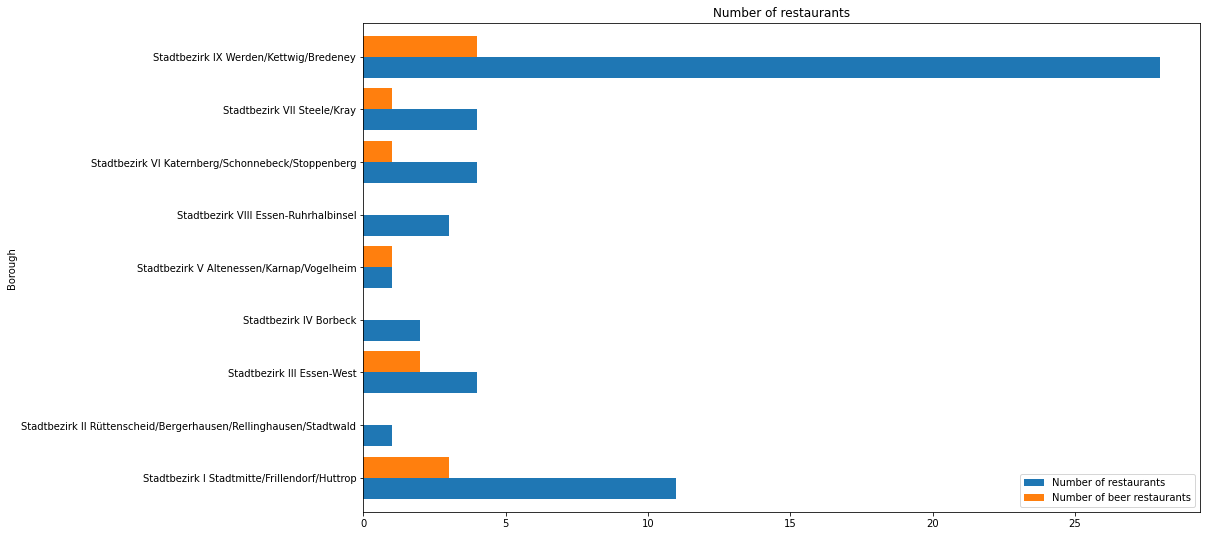

In [42]:
# step 2: plot data
df_res_beer[['Number of restaurants', 'Number of beer restaurants']].plot(kind='barh', figsize=(15, 9), width = 0.8)
plt.ylabel('Borough') # add y-label to the plot
plt.title('Number of restaurants') # add title to the plot
plt.yticks (np.arange(9), df['Borough'])
plt.show()

## 3.2 Cluster Analysis

In order to identify groups (clusters) with similar characteristics, let's us apply the unsupervised learning method to our data, namely K-Means algorithm. But before that, we can reduce the number of features and remove columns "Population", "Number of restaurants" and "Number of beer restaurants". These three columns we can replace with two new ones, namely, "Number of restaurants per thousand people" and "Number of beer restaurants per thousand people".

In [43]:
df_clusters = df_res_beer.drop(['Borough','Latitude', 'Longitude', 'Population Density'],axis = 1)
df_clusters['Number of restaurants per 1000 people'] = df_clusters['Number of restaurants']/(df_clusters['Population']/1000)
df_clusters['Number of beer restaurants per 1000 people'] = df_clusters['Number of beer restaurants']/(df_clusters['Population']/1000)
df_clusters = df_clusters.drop(['Population', 'Number of restaurants', 'Number of beer restaurants'], axis = 1)
df_clusters.head()

,Net_income,Number of restaurants per 1000 people,Number of beer restaurants per 1000 people
0,90.40,0.191908,0.052339
1,110.60,0.021192,NaN
2,120.60,0.047737,0.023869
3,98.20,0.028352,NaN
4,111.11,0.021287,0.021287


### We have to do some Normalizarion

In [44]:
from sklearn.preprocessing import StandardScaler
df_clusters = StandardScaler().fit_transform(df_clusters)
df_clusters

array([[-1.31094954,  0.33303378,  0.54983791],
       [ 0.80735662, -0.59157032,         nan],
       [ 1.85602304, -0.44779984, -0.53728283],
       [-0.49298973, -0.55278906,         nan],
       [ 0.86083861, -0.59105235, -0.63584377],
       [-0.10498316, -0.32034198,         nan],
       [-0.3566631 , -0.33715564, -0.79797172],
       [-1.42630284, -0.21639677, -0.58512414],
       [ 0.16767011,  2.72407218,  2.00638456]])

## we want to replace nan(Not A Number) with zero

In [45]:
M = pd.DataFrame(df_clusters)
df_clusters =M

In [46]:
df_clusters.fillna(0, inplace=True)

In [47]:
df_clusters

,0,1,2
0,-1.310950,0.333034,0.549838
1,0.807357,-0.591570,0.000000
2,1.856023,-0.447800,-0.537283
3,-0.492990,-0.552789,0.000000
4,0.860839,-0.591052,-0.635844
5,-0.104983,-0.320342,0.000000
6,-0.356663,-0.337156,-0.797972
7,-1.426303,-0.216397,-0.585124
8,0.167670,2.724072,2.006385


### To identify the optimal number of clusters, the Elbow method is used:

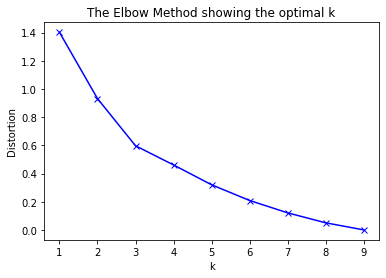

In [48]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np


distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_clusters)
    kmeanModel.fit(df_clusters)
    distortions.append(sum(np.min(cdist(df_clusters, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_clusters.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### On the graph, we can see that 3 clusters are enough

In [49]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clusters)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:9]

array([0, 2, 2, 0, 2, 0, 0, 0, 1], dtype=int32)

### Let's insert the Cluster labels into our master dataframe.

In [50]:
df_res_beer.insert(0, 'Cluster Labels', kmeans.labels_)
df_res_beer

,Cluster Labels,Borough,Latitude,Longitude,Population,Population Density,Net_income,Number of restaurants,Number of beer restaurants
0,0,Stadtbezirk I,51.466564,7.001986,57319,3677,90.40,11,3.0
1,2,Stadtbezirk II,51.425251,7.032930,47188,3519,110.60,1,NaN
2,2,Stadtbezirk III,51.439594,6.969586,83792,5106,120.60,4,2.0
3,0,Stadtbezirk IV,51.454747,6.936567,70541,2858,98.20,2,NaN
4,2,Stadtbezirk V,51.306007,6.761242,46976,2563,111.11,1,1.0
5,0,Stadtbezirk VI,51.482828,7.040808,42093,3235,101.90,3,NaN
6,0,Stadtbezirk VII,51.239720,6.860883,58680,2821,99.50,4,1.0
7,0,Stadtbezirk VIII,51.401287,7.080432,44217,1325,89.30,4,1.0
8,1,Stadtbezirk IX,51.451628,7.012125,44207,805,104.50,28,4.0


### Now, it's time to create maps representing our clusters. The first map is illustrating the clusters where the radius of the Circle marker is proportional to a Number of restaurants per 1000 people in each borough.

In [51]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
colours = ['red', 'black', 'blue']
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, income in zip(df_res_beer['Latitude'], df_res_beer['Longitude'], df_res_beer['Borough'], df_res_beer['Cluster Labels'], df_clusters.iloc[:,1]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=income*5+15,
        popup=label,
        #color=rainbow[cluster-1],
        color=colours[cluster],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### The second map is illustrating the clusters where the radius of the Circle marker is proportional to a Net income per person in each borough.

In [52]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
colours = ['red', 'black', 'blue']
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, income in zip(df_res_beer['Latitude'], df_res_beer['Longitude'], df_res_beer['Borough'], df_res_beer['Cluster Labels'], df_res_beer['Net_income']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=income*0.5-25,
        popup=label,
        #color=rainbow[cluster-1],
        color=colours[cluster],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### We can see that one of the clusters (black circle) consists only of one borough - Stadtbezirk IX. Let's look at the scatter plots of our data and define our clusters with colors. The grey circle marker is representing the centroid of each cluster. Don't forger that our data is normalized, so the axes do not deliver real values.

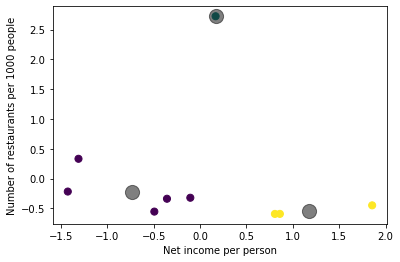

In [53]:
import matplotlib.pyplot as plt
y_kmeans = kmeans.predict(df_clusters)
plt.scatter(df_clusters.iloc[:, 0], df_clusters.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('Net income per person')
plt.ylabel('Number of restaurants per 1000 people')
plt.show()

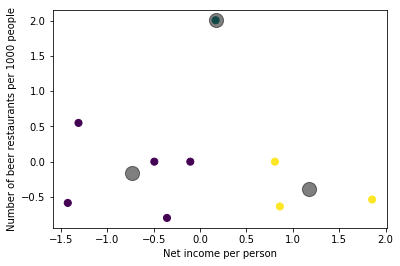

In [54]:
y_kmeans = kmeans.predict(df_clusters)
plt.scatter(df_clusters.iloc[:, 0], df_clusters.iloc[:, 2], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5);
plt.xlabel('Net income per person')
plt.ylabel('Number of beer restaurants per 1000 people')
plt.show()

In general, this borough has a good concentraition of beer restaurants and restaurants in general. From maps above we can easily say that it is Stadtbezirk IX. Two other clusters were defined according to a Net income per person. Let us see which boroughs belongs to which clusters.

In [55]:
df_res_beer[(df_res_beer['Cluster Labels'] == 0)]

,Cluster Labels,Borough,Latitude,Longitude,Population,Population Density,Net_income,Number of restaurants,Number of beer restaurants
0,0,Stadtbezirk I,51.466564,7.001986,57319,3677,90.4,11,3.0
3,0,Stadtbezirk IV,51.454747,6.936567,70541,2858,98.2,2,NaN
5,0,Stadtbezirk VI,51.482828,7.040808,42093,3235,101.9,3,NaN
6,0,Stadtbezirk VII,51.239720,6.860883,58680,2821,99.5,4,1.0
7,0,Stadtbezirk VIII,51.401287,7.080432,44217,1325,89.3,4,1.0


In [56]:
df_res_beer[(df_res_beer['Cluster Labels'] == 2)]

,Cluster Labels,Borough,Latitude,Longitude,Population,Population Density,Net_income,Number of restaurants,Number of beer restaurants
1,2,Stadtbezirk II,51.425251,7.032930,47188,3519,110.60,1,NaN
2,2,Stadtbezirk III,51.439594,6.969586,83792,5106,120.60,4,2.0
4,2,Stadtbezirk V,51.306007,6.761242,46976,2563,111.11,1,1.0


In [57]:
df_res_beer[(df_res_beer['Cluster Labels'] == 1)]

,Cluster Labels,Borough,Latitude,Longitude,Population,Population Density,Net_income,Number of restaurants,Number of beer restaurants
8,1,Stadtbezirk IX,51.451628,7.012125,44207,805,104.5,28,4.0


# 4. Results and discussion

##### During the analysis, three clusters were defined. One cluster, that consists of only one area, has been defined as the outsider, due to the high number of competitors, which means that the placement of beer restaurant in that area is too risky venture. Two other groups were clustered according to the amount income per person. It is obvious, that the cluster with highest average income per person has the highest priority for us (Cluster 2).
##### Stadtbezirk II and Stadtbezirk III are the most attractive options in terms of distances to the center of their own cluster and relatively high value of income per person. However, one can perform further analysis of this particular cluster with additional features, such as distance to the center of city or to the center of cluster. After defining a borough one can perform deeper analysis to find the best exact location of the restaurant taking into account factors such as number of parking places in the vicinity of the spot or distances to the main streets.
##### What could be done better? 
##### Foursquare doesn't represent the full picture, since many venues are not on the list. For that reason, another maps could be utilized such as Google map or Openstreet map.
##### Boroughs have too complex geometry, thus defining the closest venues within the certain radius brings additional error to our analysis.

# 5. Conclusion

##### To conclude, the basic data analysis was performed to identify the most optimal boroughs for the placement of the beer restaurant in the city of Essen. During the analysis, several important statistical features of the boroughs were explored and visualized. Furthermore, clustering helped to highlight the group of optimal areas. Finally, Stadtbezirk II and Stadtbezirk III were chosen as the most attractive options for the further analysis.